In [1]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

Learning Loop

In [3]:
from models.pdqn import PDQN
from environment import ClashRoyaleEnv

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [57]:
env = ClashRoyaleEnv()
agent = PDQN(env)
#agent.load_weights("E:/RL/Clash Royale/workspace/models/weights/PDQN")
rewards = []
done = False
steps = 0
episodes = 1
action_refresh_rate = 5 #frame skip

for t in range(episodes):
    state = env.start()
    done= False
    episode_reward = 0
    while not done:
        if steps % action_refresh_rate == 0:
            action = agent.make_action(state, steps)
        nstate, reward, done = env.step(action)
        agent.memorize(state, action[1], reward, done, nstate)

        state = nstate
        episode_reward += reward
        rewards.append(reward)
        
        if steps % 5 == 0:
            agent.replay(1)
        
        if done:
            env.reset()
            time.sleep(3.5)
            
        if steps % 20 == 0:
            agent.on_episode_end()
        steps += 1
    #rewards.append(episode_reward)
        
    #agent.save_weights("E:/RL/Clash Royale/workspace/models/weights/PDQN")
    

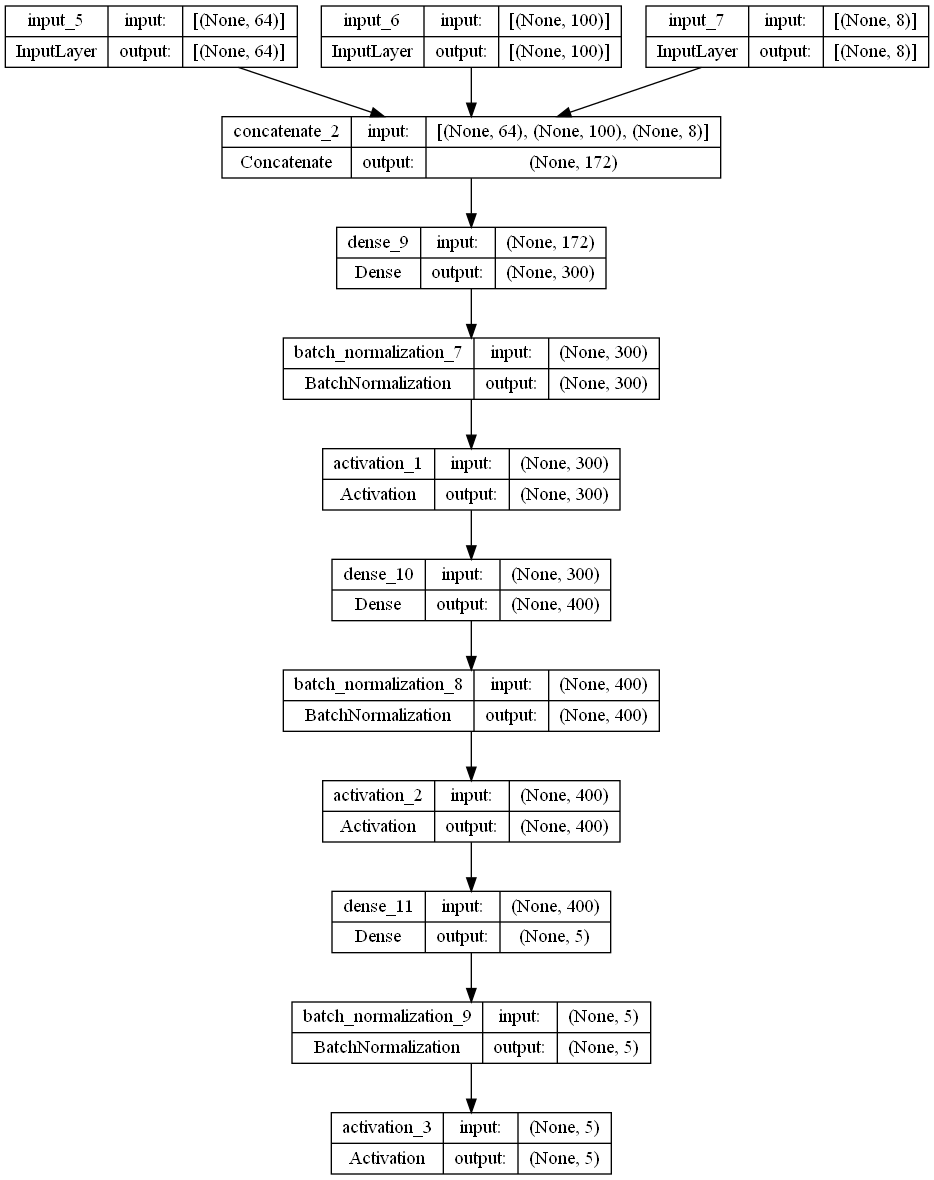

In [10]:
from keras.utils.vis_utils import plot_model
plot_model(agent.actor.network, to_file='model_plot_actor.png', show_shapes=True, show_layer_names=True)
plot_model(agent.critic.network, to_file='model_plot_critic.png', show_shapes=True, show_layer_names=True)